# Creating Deep MLPs and CNNs with pytorch

In [71]:
import warnings
warnings.filterwarnings('ignore')
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Mnist images

In [61]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [62]:
# to be modified if not on colab
root_dir = './data/MNIST/'
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root_dir, train=True, download=True, transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
    batch_size=256, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root_dir, train=False, download=True, transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
    batch_size=10, shuffle=False)

train_loader

### Creating Model using nn.Sequential

In [63]:
import torch.nn as nn
model = torch.nn.Sequential(nn.Linear(784, 50), nn.ReLU(), nn.Linear(50,10), nn.Sigmoid())

### Creating Model using Modules

MLP with MSE loss

In [64]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=200)
        self.fc2 = nn.Linear(in_features=200, out_features=10)
    def forward(self,x):
     x = self.fc1(x)
     x = F.relu(x)
     x = self.fc2(x)
     return F.softmax(x)

In [65]:
model.to('cuda')

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
  (3): Sigmoid()
)

In [66]:
loss_fn  = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters())

In [78]:
def test(nn, test_loader, loss_fn):
   nn.eval()
   test_loss = 0
   correct = 0
   with torch.no_grad():
     for data, target in test_loader:
       data = data.view([-1, 784]).to(device)
       target = target.to(device)
       output = nn(data)
       targetsV  = F.one_hot(target, num_classes=10)+0.0
       test_loss += loss_fn(output, targetsV)
       pred = output.data.max(1, keepdim=True)[1]
       correct += pred.eq(target.data.view_as(pred)).sum()
   test_loss /= len(test_loader.dataset)
   print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
     test_loss, correct, len(test_loader.dataset),
     100. * correct / len(test_loader.dataset)))
   return test_loss.item()

In [79]:
def train_MLP(nn, train_loader, test_loader, loss_fn, n_epochs, optimizer):
    train_loss = []
    test_loss = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
           # get the inputs; data is a list of [inputs, labels]

           optimizer.zero_grad()
           inputs = inputs.view([-1, 784]).to(device)
           targets = targets.to(device)
           outputs = nn(inputs)
           targetsV  = F.one_hot(targets, num_classes=10)+0.0

           loss = loss_fn(outputs, targetsV)

           loss.backward()
           optimizer.step()

           # print statistics
           running_loss += loss.item()
        print(f'epoch : {epoch + 1} loss: {running_loss / len(train_loader):.3f}')
        train_loss.append(running_loss / len(train_loader))
        test_loss.append(test(nn, test_loader, loss_fn))
    return train_loss, test_loss

In [85]:
train_loss, test_loss = train_MLP(model, train_loader, test_loader, loss_fn, 10, optimizer)

epoch : 1 loss: 0.083

Test set: Avg. loss: 0.0079, Accuracy: 4939/10000 (49%)

epoch : 2 loss: 0.075

Test set: Avg. loss: 0.0072, Accuracy: 5554/10000 (56%)

epoch : 3 loss: 0.068

Test set: Avg. loss: 0.0065, Accuracy: 6096/10000 (61%)

epoch : 4 loss: 0.062

Test set: Avg. loss: 0.0059, Accuracy: 6470/10000 (65%)

epoch : 5 loss: 0.057

Test set: Avg. loss: 0.0054, Accuracy: 6946/10000 (69%)

epoch : 6 loss: 0.052

Test set: Avg. loss: 0.0049, Accuracy: 7466/10000 (75%)

epoch : 7 loss: 0.048

Test set: Avg. loss: 0.0046, Accuracy: 7874/10000 (79%)

epoch : 8 loss: 0.045

Test set: Avg. loss: 0.0042, Accuracy: 8131/10000 (81%)

epoch : 9 loss: 0.042

Test set: Avg. loss: 0.0040, Accuracy: 8337/10000 (83%)

epoch : 10 loss: 0.039

Test set: Avg. loss: 0.0037, Accuracy: 8443/10000 (84%)



Text(0, 0.5, 'Loss')

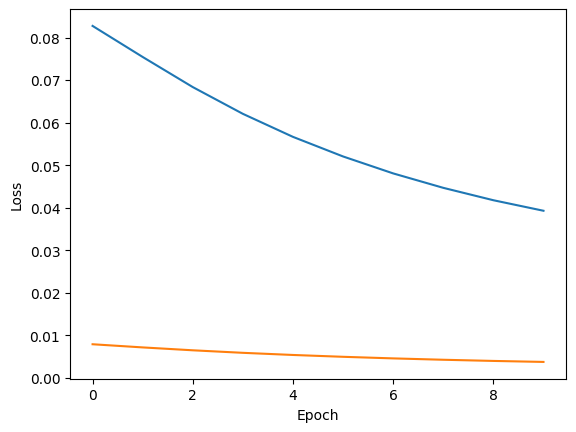

In [86]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [87]:
learning_rate = 0.01
momentum = 0.5

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)


In [88]:
train_loss, test_loss = train_MLP(model, train_loader, test_loader, loss_fn, 10, optimizer)

epoch : 1 loss: 0.037

Test set: Avg. loss: 0.0035, Accuracy: 8526/10000 (85%)

epoch : 2 loss: 0.035

Test set: Avg. loss: 0.0034, Accuracy: 8603/10000 (86%)

epoch : 3 loss: 0.034

Test set: Avg. loss: 0.0032, Accuracy: 8642/10000 (86%)

epoch : 4 loss: 0.033

Test set: Avg. loss: 0.0031, Accuracy: 8681/10000 (87%)

epoch : 5 loss: 0.031

Test set: Avg. loss: 0.0030, Accuracy: 8725/10000 (87%)

epoch : 6 loss: 0.030

Test set: Avg. loss: 0.0029, Accuracy: 8736/10000 (87%)

epoch : 7 loss: 0.029

Test set: Avg. loss: 0.0028, Accuracy: 8764/10000 (88%)

epoch : 8 loss: 0.029

Test set: Avg. loss: 0.0027, Accuracy: 8789/10000 (88%)

epoch : 9 loss: 0.028

Test set: Avg. loss: 0.0027, Accuracy: 8813/10000 (88%)

epoch : 10 loss: 0.027

Test set: Avg. loss: 0.0026, Accuracy: 8830/10000 (88%)



Text(0, 0.5, 'Loss')

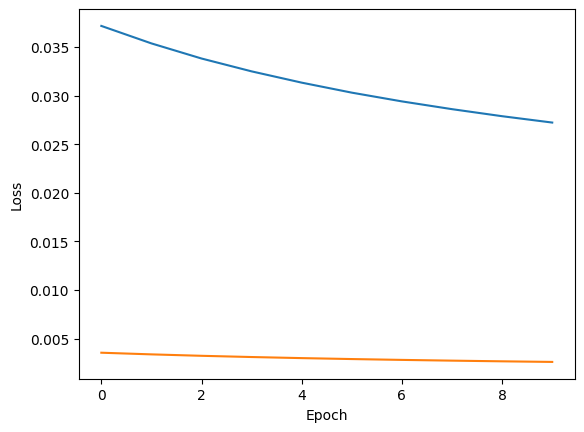

In [89]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

MSE with NLL loss

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=200)
        self.fc2 = nn.Linear(in_features=200, out_features=10)
    def forward(self,x):
     x = self.fc1(x)
     x = F.relu(x)
     x = self.fc2(x)
     return F.log_softmax(x)

In [ ]:
model = MLP()

In [ ]:
#loss_fn = nn.BCELoss()

loss_fn  = nn.NLLLoss()

learning_rate =0.001
momentum = 0.5

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
def test(nn, test_loader, loss_fn):
   nn.eval()
   test_loss = 0
   correct = 0
   with torch.no_grad():
     for data, target in test_loader:
       data = data.view([-1, 784]).to(device)
       target = target.to(device)
       output = nn(data)
       targetsV  = F.one_hot(target, num_classes=10)+0.0
       test_loss += loss_fn(output, targetsV)
       pred = output.data.max(1, keepdim=True)[1]
       correct += pred.eq(target.data.view_as(pred)).sum()
   test_loss /= len(test_loader.dataset)
   print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
     test_loss, correct, len(test_loader.dataset),
     100. * correct / len(test_loader.dataset)))
   return test_loss.item()

In [ ]:
def train_MLP(nn, train_loader, test_loader, loss_fn, n_epochs, optimizer):
    train_loss = []
    test_loss = []
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for batch_idx, (inputs, targets) in enumerate(train_loader):
           # get the inputs; data is a list of [inputs, labels]

           optimizer.zero_grad()
           inputs = inputs.view([-1, 784]).to(device)
           targets = targets.to(device)
           outputs = nn(inputs)
           targetsV  = F.one_hot(targets, num_classes=10)+0.0

           loss = loss_fn(outputs, targetsV)

           loss.backward()
           optimizer.step()

           # print statistics
           running_loss += loss.item()
        print(f'epoch : {epoch + 1} loss: {running_loss / len(train_loader):.3f}')
        train_loss.append(running_loss / len(train_loader))
        test_loss.append(test(nn, test_loader, loss_fn))
    return train_loss, test_loss

In [ ]:
train_loss, test_loss = train_MLP(model, train_loader, test_loader, loss_fn, 10, optimizer)

In [ ]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

### Convnet

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
model = CNN()

In [ ]:
#loss_fn = nn.BCELoss()

loss_fn  = nn.NLLLoss()

learning_rate =0.001
momentum = 0.5

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
def test_CNN(nn, test_loader):
  nn.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      #data = data.view([-1, 784]).to(device)
      output = nn(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
def train_CNN(nn, trainloader, test_loader, loss_fn, n_epochs, optimizer):
  for epoch in range(n_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
      # get the inputs; data is a list of [inputs, labels]

      optimizer.zero_grad()
      #inputs = inputs.view([-1, 784]).to(device)
      outputs = nn(inputs)

      loss = loss_fn(outputs, targets)

      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
    print(f'epoch : {epoch + 1} loss: {running_loss / len(train_loader):.3f}')
    test_CNN(nn, test_loader)


In [ ]:
train_CNN(model, train_loader, test_loader, loss_fn, 10, optimizer)